<font size=8 face="Courier"><b>Eigendecomposition of Neuron Spikedata

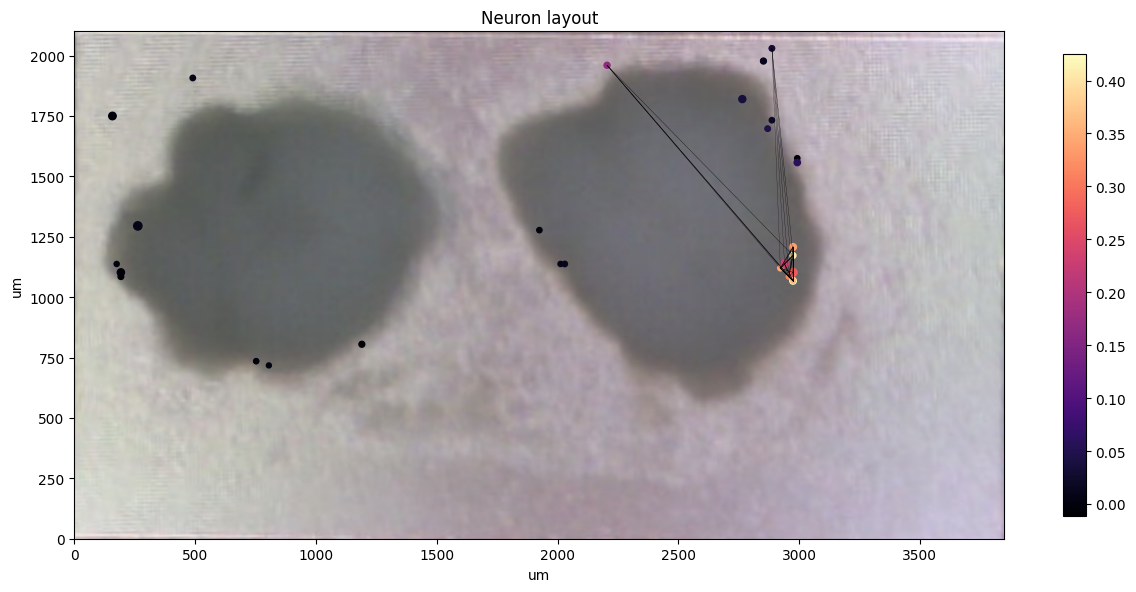

In [1]:
%run "/workspaces/human_hippocampus/dev/elliott/spike_data/Ari/Eigendecomposition_Source_Code.ipynb"

Loading: Eigendecomposition_Source_Code.ipynb...
Done at: 2023/12/18 13:40:37


### <font color="green">Settings: 

Use the following interactable widget to select a desired color for the Notebooks plots, some plot colors will do a better job at showing the data you desire, for the ease of use the default plot color is set to magma, there is no need to run the function if you do not wish to change it from magma:

In [3]:
interact_manual( ColorSelect, selection=colors )

interactive(children=(Dropdown(description='selection', options=('viridis', 'plasma', 'inferno', 'magma', 'civ…

<function __main__.ColorSelect(selection)>

Use the following function to load a desired recording into the notebook's workspace. The function will ask you to select a folder (dataset) and then a file (recording segment from said dataset), Then hit 'Run Interact' to load the data into the workspace. Note that no default is pre-loaded and this function is required to be ran. 

In [5]:
#interact_manual( loadData, FolderName=data_folders)

In [2]:
import pickle

In [3]:
with open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb') as f:
    sd = pickle.load(f)

Run the cell bellow to calculate the Correlation, Spike Time Tiling, and eigendecompositions of both which will be used throughout the notebook.  

In [4]:
Corr = correlation(sd)
STTC = get_sttc(sd)
Toep = toeplitz(Corr)
    
Wcorr, Ucorr = eigenvalues_eigenvectors(Corr)
Wsttc, Usttc = eigenvalues_eigenvectors(STTC)
Wt, Ut = eigenvalues_eigenvectors(Toep)

Note that the Toeplitz matrix of the recording segment is also calculated, you will see it plotted later in the notebook but is not of much worth to our analysis and can be mostly ignored. The toeplitz matrix is constructed in a certain way to transform the data into a visually interesting representation, however because of this transformation it means most of the information garnered from this representation isn't all that relevant to what we are trying to look at in this notebook. It is included here in case we notice anything odd/interesting from it.  

## Correlation Methods

Here we plot two matrix representations of inter-neuron correlation for the selected recording segment. The two representations are <i>Correlation</i> and the <i>Spike Time Tiling Coefficient</i>. Spike Time Tiling (STTC) leads to better quantification of correlations when compared to Correlation, which is unbound from above and confounded by firing rate. Thus, it suggested to focus on STTC for this analyis. 

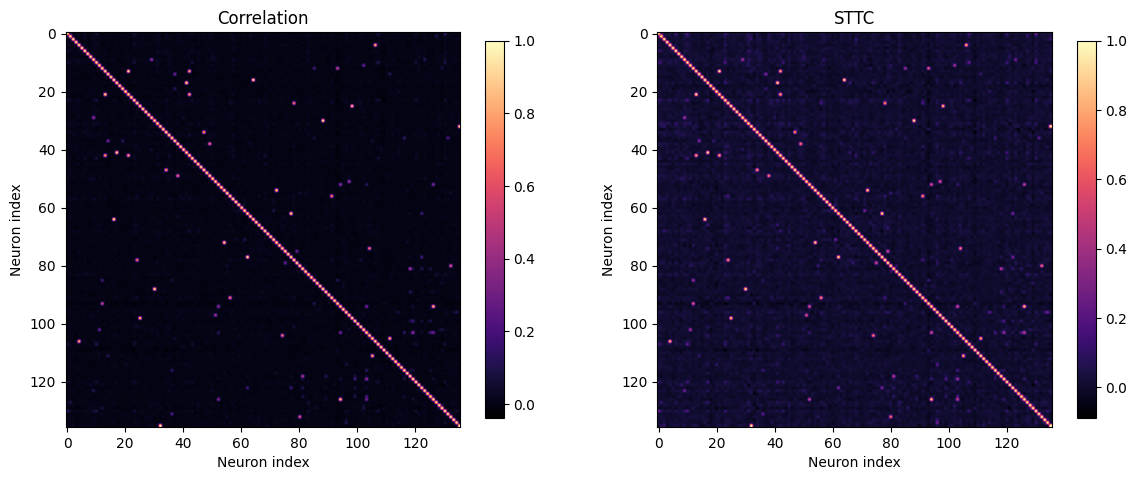

In [5]:
corrMethPlots(Corr, STTC)

## Eigenvector Analysis

### <font color="green"> Basic Analysis

We now get th eigenvectors of both the Correlation and STTC matrices (from the above section), and plot them below:

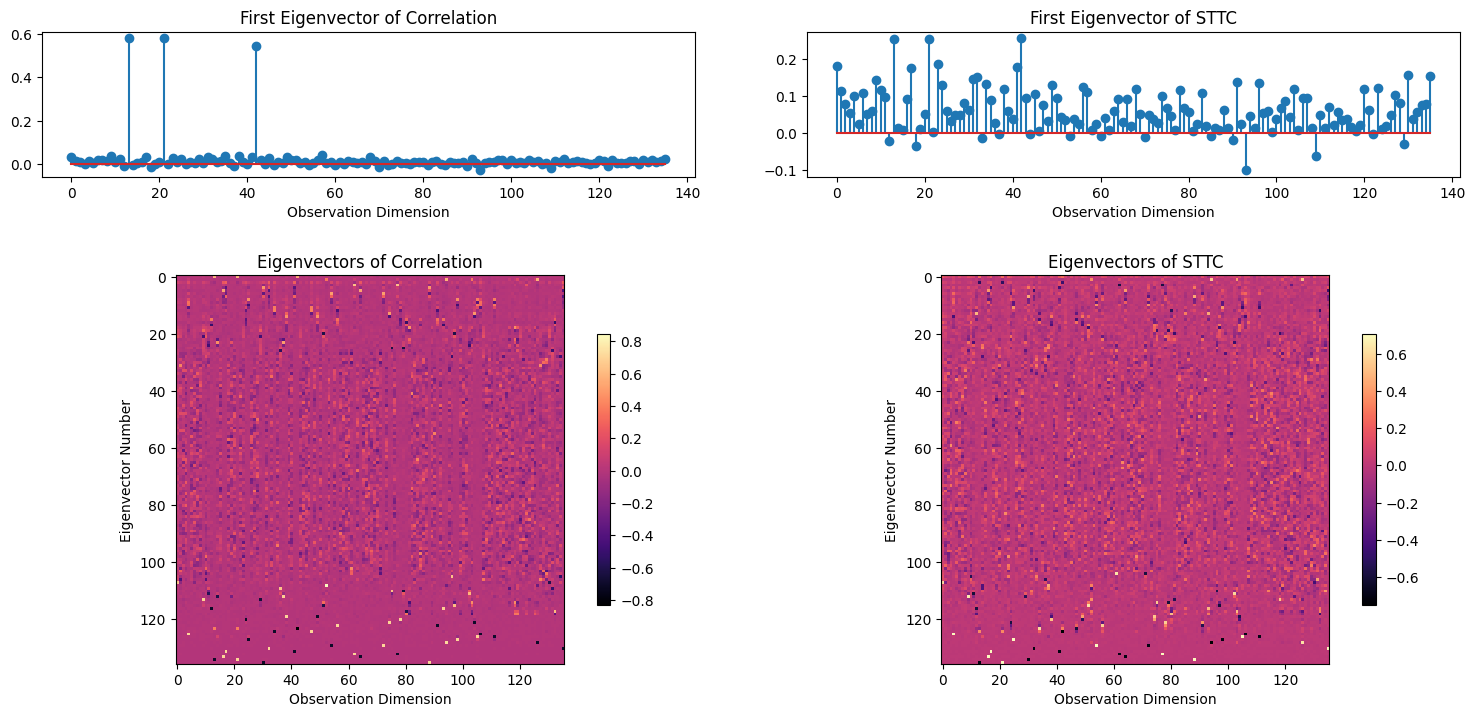

In [6]:
EigenvectorAnalysis(Ucorr, Usttc)

We can zoom in on the first five rows of the above matrices to get a better understanding of the higher rank eigenvectors. Run the widget bellow and select the desired correlation method to see these plotted: 

In [7]:
interact_manual( plot_basis, method=method_options)

interactive(children=(Dropdown(description='method', options=('Correlation', 'Spike Time Tiling'), value='Corr…

<function __main__.plot_basis(method)>

### Reconstruction Plots

Here we make two plots, the <i>Eigenvalue Spectrum</i> and the <i>Reconstruction Error</i>. First, the Eigenvalue Spectrum plots the significance of the eigenvalues over their rank, we should see that the first few eigenvalues of the STTC hold greater significance to the first few of the Correlation. Next the Reconstruction Error, which plots....

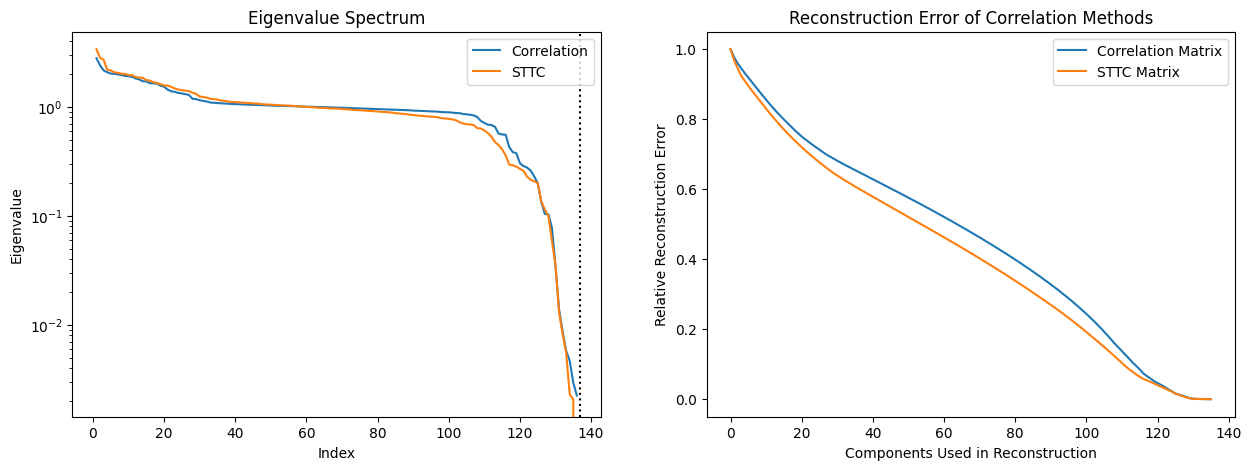

In [8]:
ReconstructPlots(Wcorr, Wsttc, Corr, STTC)

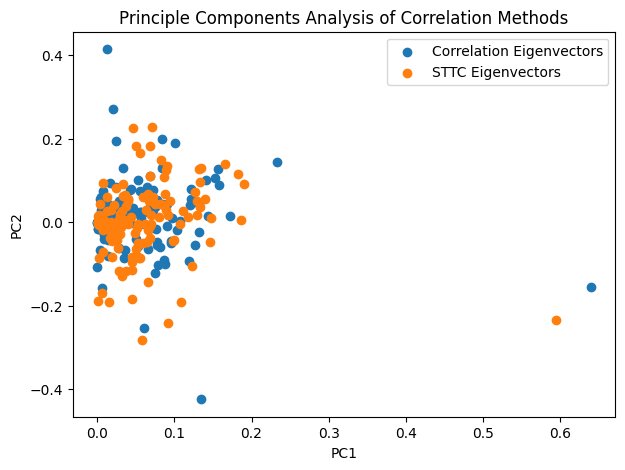

In [9]:
PCAplots(Ucorr, Usttc)

### Eigenvector Layout

In [10]:
interact_manual(EigenvectorLayout, Method=method_options)

interactive(children=(Dropdown(description='Method', options=('Correlation', 'Spike Time Tiling'), value='Corr…

<function __main__.EigenvectorLayout(Method)>

## <font color="red">Random Permutations

interactive(children=(Dropdown(description='method', options=('Rotation', 'Shuffle', 'Kenneth Harris'), value=…

<function __main__.RandomiseDataset(method, seed, resolution)>

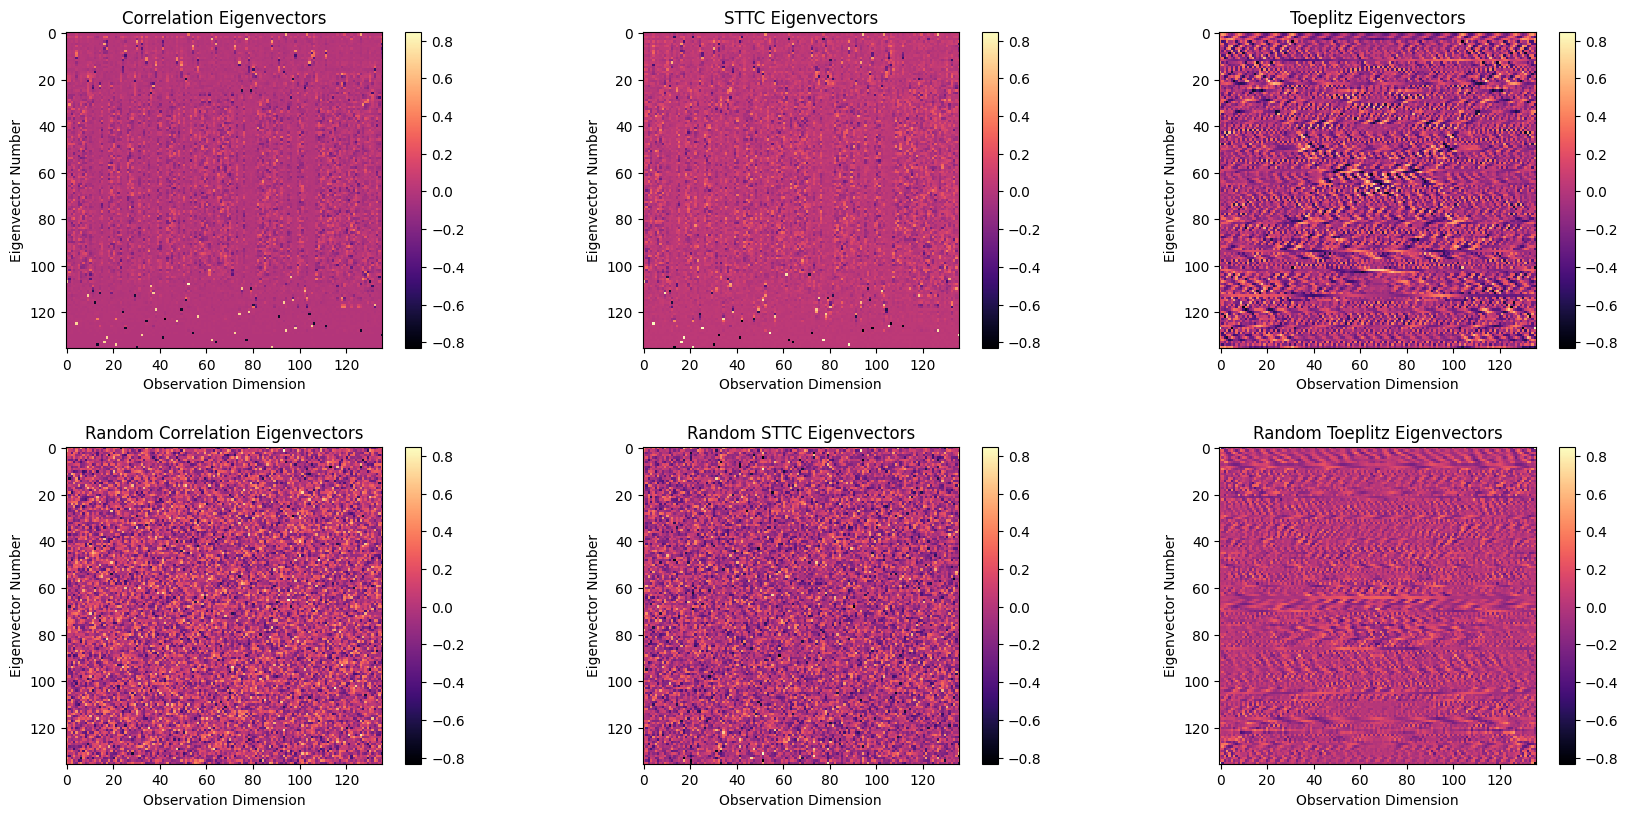

In [12]:
interact_manual( RandomiseDataset, method=randMethods, seed=(1,10000), resolution=(0,1,0.001))

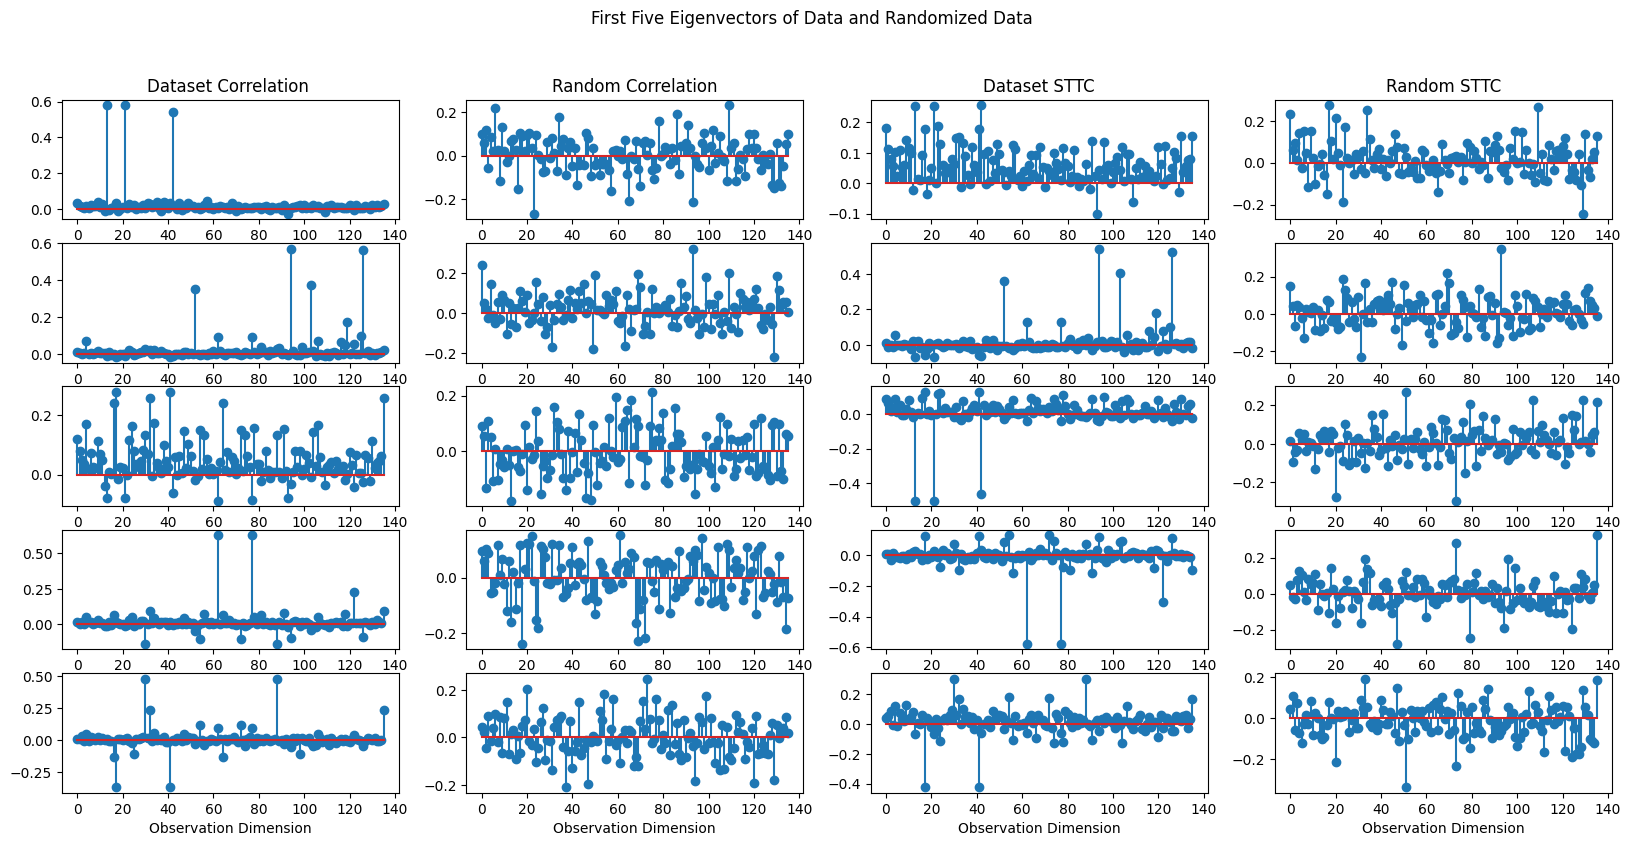

In [13]:
PlotRandomBasis()

In [14]:
interact_manual( plotRandEvectLayout, Method=method_options )

interactive(children=(Dropdown(description='Method', options=('Correlation', 'Spike Time Tiling'), value='Corr…

<function __main__.plotRandEvectLayout(Method)>

In [ ]:
PlotRandomCheck()

In [ ]:
randCorr = correlation(rsd)
randSTTC = get_sttc(rsd)

WRcorr, URcorr = eigenvalues_eigenvectors(randCorr)
WRsttc, URsttc = eigenvalues_eigenvectors(randSTTC)
    
ReconstructPlots(WRcorr, WRsttc, randCorr, randSTTC)

In [ ]:
plot_raster(sd)

In [ ]:
plot_raster(rsd)